
# REGRESION LINEAL MULTIPLE PARA PRECIO DE AUTO
# DATASET : [kaggle](https://www.kaggle.com/datasets/asinow/car-price-dataset)

In [1]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
sns.set(style='whitegrid',context='notebook')

In [4]:
path = kagglehub.dataset_download("asinow/car-price-dataset")
file = '/car_price_dataset.csv'

path_file = path + file

print("Path to dataset files:", path_file)


df = pd.read_csv(path_file)
df.head(5)

100%|██████████| 135k/135k [00:00<00:00, 622kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1/car_price_dataset.csv


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:

df = df.clean_names()
df

,brand,model,year,engine_size,fuel_type,transmission,mileage,doors,owner_count,price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [6]:
df.isna().sum().sum()

0

In [7]:
df.dtypes

,0
brand,object
model,object
year,int64
engine_size,float64
fuel_type,object
transmission,object
mileage,int64
doors,int64
owner_count,int64
price,int64


In [8]:
cols = ['engine_size','mileage','doors','price','owner_count']

outliers = {}

for col in cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

outliers_counts = {col: len(outliers[col]) for col in cols}
outliers_counts

{'engine_size': 0, 'mileage': 0, 'doors': 0, 'price': 6, 'owner_count': 0}

In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [19]:
df_cleaned = remove_outliers(df,'price')

In [20]:
df_cleaned.shape

(9994, 10)

# CODIFICACION DE VARIABLES CATEGORICAS

In [21]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['brand', 'model', 'fuel_type', 'transmission'], dtype='object')

In [22]:
for cc in categorical_columns:
  print("*"*50)
  print(df[cc].value_counts())

**************************************************
brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
**************************************************
model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64
**************************************************
fuel_type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64
*********

In [23]:
df_cleaned.drop(columns=['model'],inplace=True)


<ipython-input-23-958b4e167486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['model'],inplace=True)


In [26]:
categorical_columns = df_cleaned.select_dtypes(object).columns
categorical_columns

Index(['brand', 'fuel_type', 'transmission'], dtype='object')

In [25]:
import sklearn.compose
import sklearn.preprocessing
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(),categorical_columns),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['brand', 'fuel_type', 'transmission'], dtype='object'))])

In [27]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df_cleaned),
        columns = transformer.get_feature_names_out(),
        index=df_cleaned.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df = data_transformed_df.clean_names()
data_transformed_df

,brand_audi,brand_bmw,brand_chevrolet,brand_ford,brand_honda,brand_hyundai,brand_kia,brand_mercedes,brand_toyota,brand_volkswagen,...,fuel_type_petrol,transmission_automatic,transmission_manual,transmission_semi_automatic,year,engine_size,mileage,doors,owner_count,price
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2020.0,4.2,289944.0,3.0,5.0,8501.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2012.0,2.0,5356.0,2.0,3.0,12092.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2020.0,4.2,231440.0,4.0,2.0,11171.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2023.0,2.0,160971.0,2.0,1.0,11780.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2003.0,2.6,286618.0,3.0,3.0,2867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2004.0,3.7,5794.0,2.0,4.0,8884.0
9996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2002.0,1.4,168000.0,2.0,1.0,6240.0
9997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2010.0,3.0,86664.0,5.0,1.0,9866.0
9998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2002.0,1.4,225772.0,4.0,1.0,4084.0


In [28]:
corr_matrix = data_transformed_df.corr()
corr_charges = corr_matrix['price']
corr_charges.sort_values(ascending=False)

,price
price,1.000000
year,0.662664
engine_size,0.356057
transmission_automatic,0.243929
fuel_type_electric,0.225144
fuel_type_hybrid,0.047411
brand_chevrolet,0.018096
brand_mercedes,0.013779
brand_volkswagen,0.008787
brand_audi,0.007992


<Axes: >

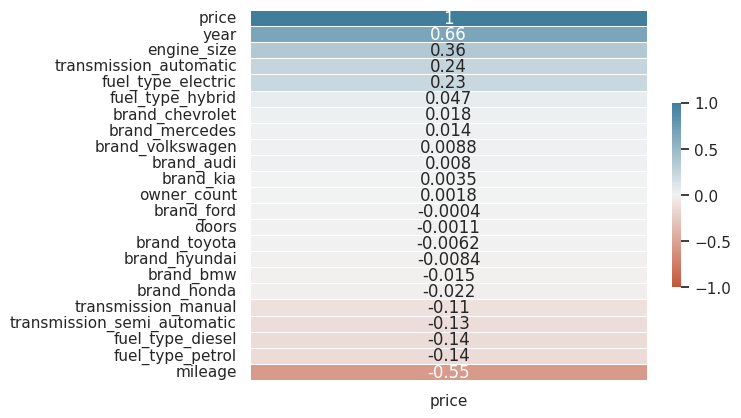

In [29]:
sns.heatmap(
    data=corr_charges.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

In [30]:
X_cols = ['year','engine_size','transmission_automatic','fuel_type_electric','fuel_type_hybrid']
y_col = ['price']

In [31]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X = data_transformed_df[X_cols].values
y = data_transformed_df[y_col].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

#creamos el modelo
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


#erro cuadratico medio
mse = metrics.mean_squared_error(y_test,y_pred)
#R2 Coeficiente de determinación
r2 = metrics.r2_score(y_test,y_pred)

print(f'El error cuadratico medio(MSE) es de {round(mse,4)}')
print(f'El coeficiente de determinación(R2) es de {round(r2,4)}')

El error cuadratico medio(MSE) es de 0.3112
El coeficiente de determinación(R2) es de 0.6888


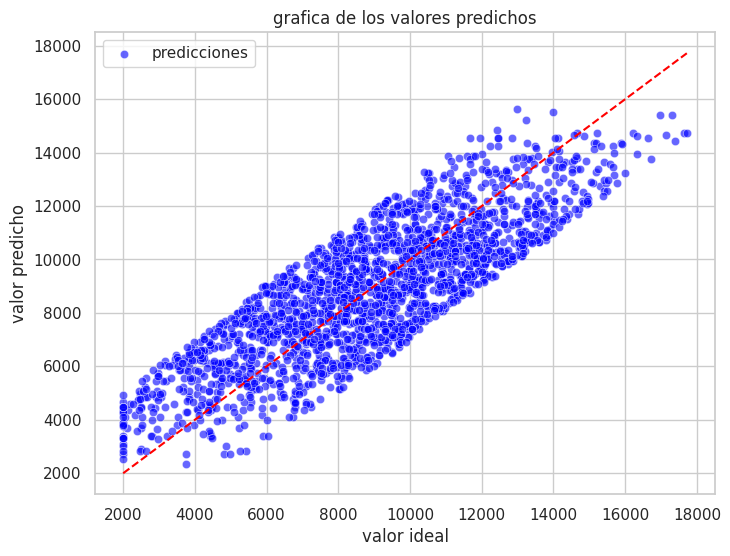

In [32]:
y_test_inv = sc_y.inverse_transform(y_test)
y_pred_inv = sc_y.inverse_transform(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_inv.flatten(),y=y_pred_inv.flatten(),alpha=0.6,color='blue',label='predicciones')
plt.plot([min(y_test_inv),max(y_test_inv)],[min(y_test_inv),max(y_test_inv)],color='red',linestyle='--')

plt.xlabel("valor ideal")
plt.ylabel("valor predicho")
plt.title("grafica de los valores predichos")
plt.legend()
plt.show()

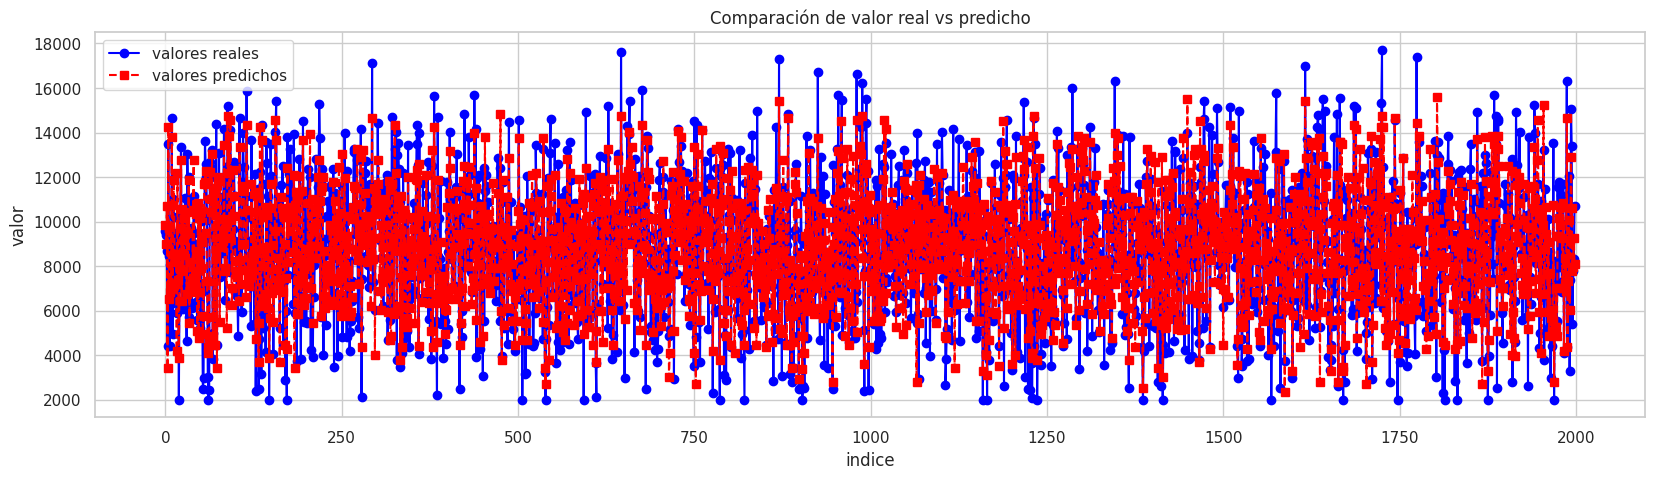

In [33]:
y_test_inv = sc_y.inverse_transform(y_test)
y_pred_inv = sc_y.inverse_transform(y_pred)


plt.figure(figsize=(20,5))
plt.plot(y_test_inv.flatten(),label='valores reales',marker='o',linestyle='-',color='blue')
plt.plot(y_pred_inv.flatten(),label='valores predichos',marker='s',linestyle='--',color='red')


plt.xlabel("indice")
plt.ylabel("valor")
plt.title("Comparación de valor real vs predicho")
plt.legend()
plt.grid(True)
plt.show()